In [7]:
from typing import Tuple, Union
import numpy as np
import cv2
import math
import deskew
from deskew import determine_skew
from IPython.display import Image

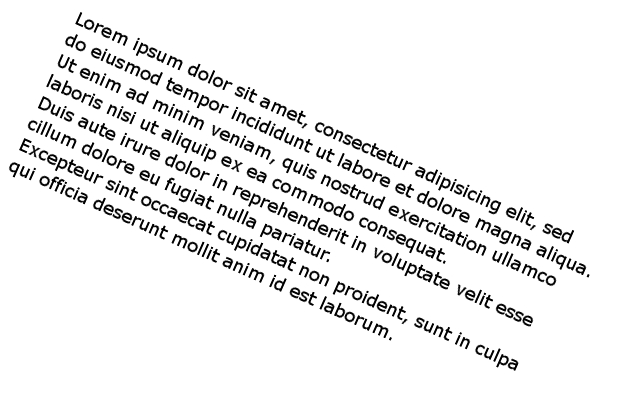

In [9]:
Image('skew_img.jpg')

In [2]:
def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)


In [4]:
image = cv2.imread('skew_img.jpg')
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
angle = determine_skew(grayscale)
rotated = rotate(image, angle, (0, 0, 0))
cv2.imwrite('output.png', rotated)

True

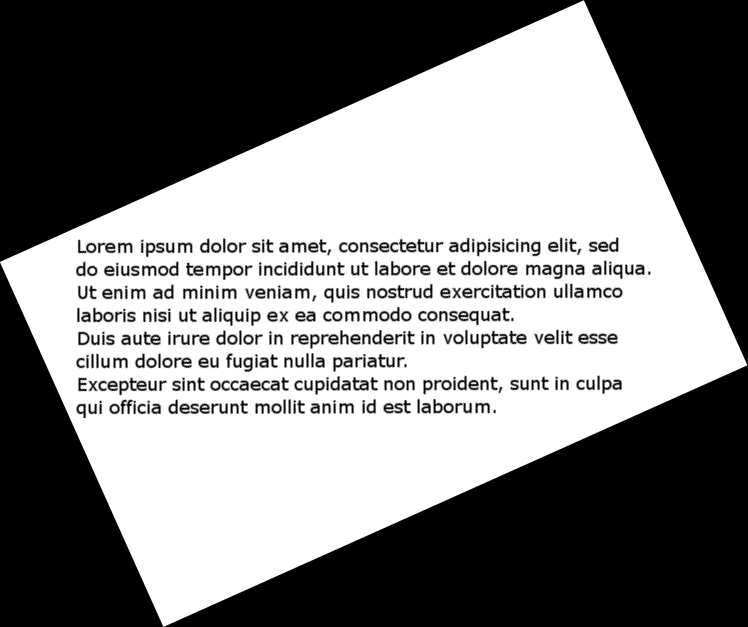

In [10]:
Image('output.png')

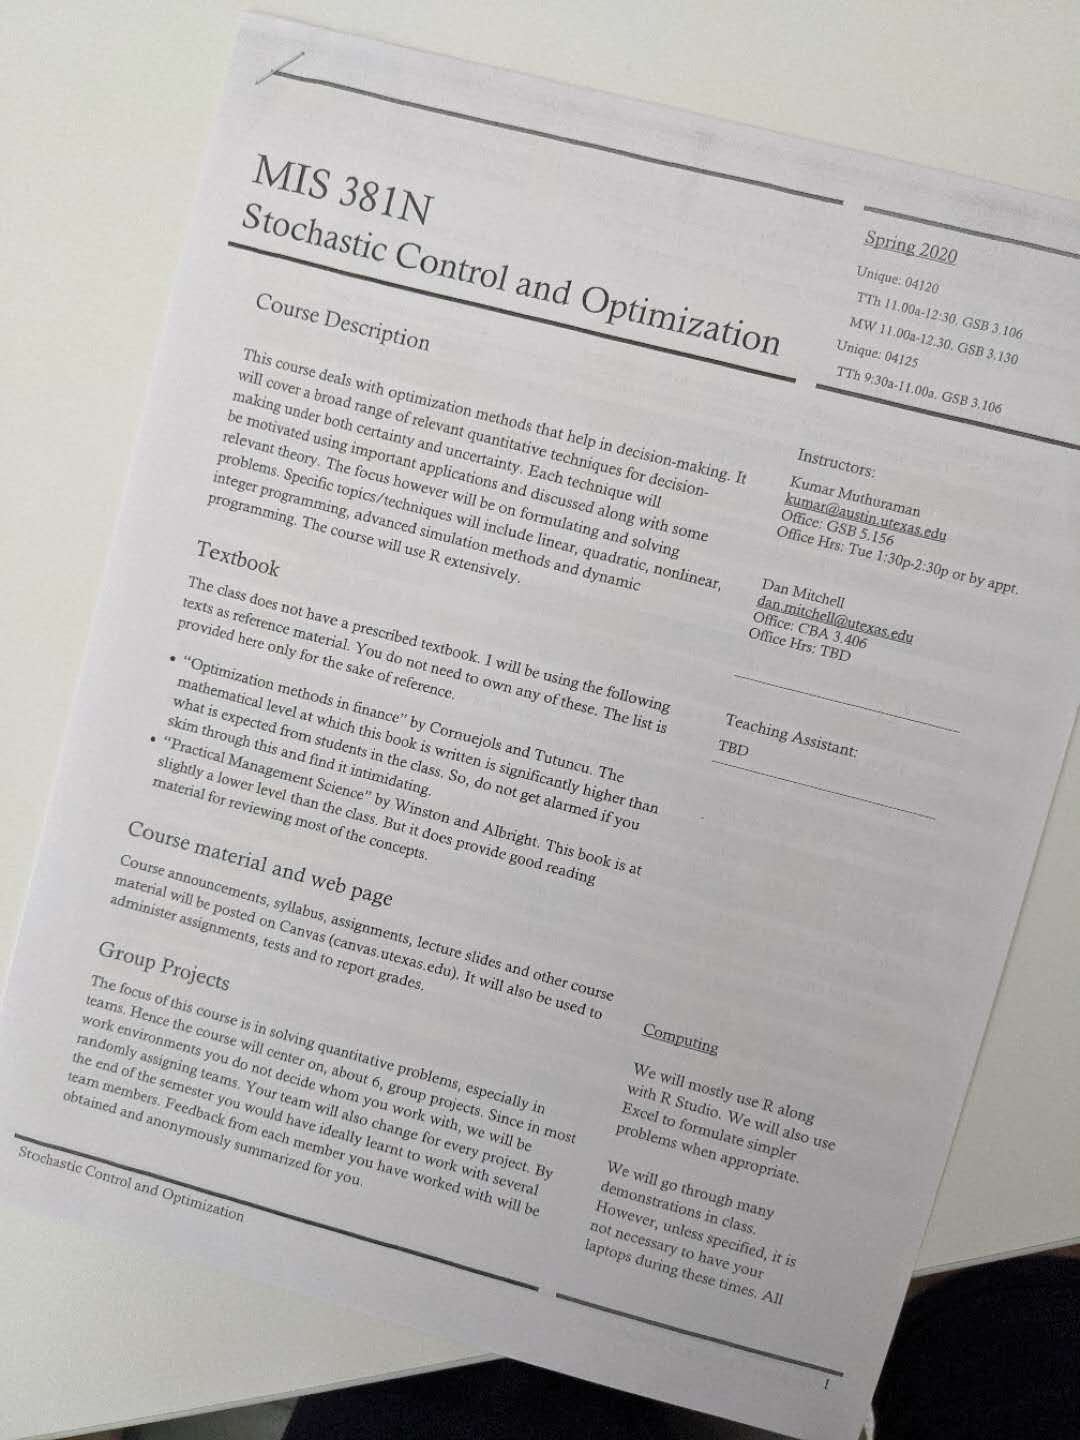

In [11]:
Image('skew_img_2.jpg')

In [12]:
image = cv2.imread('skew_img_2.jpg')
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
angle = determine_skew(grayscale)
rotated = rotate(image, angle, (0, 0, 0))
cv2.imwrite('output_2.png', rotated)

True

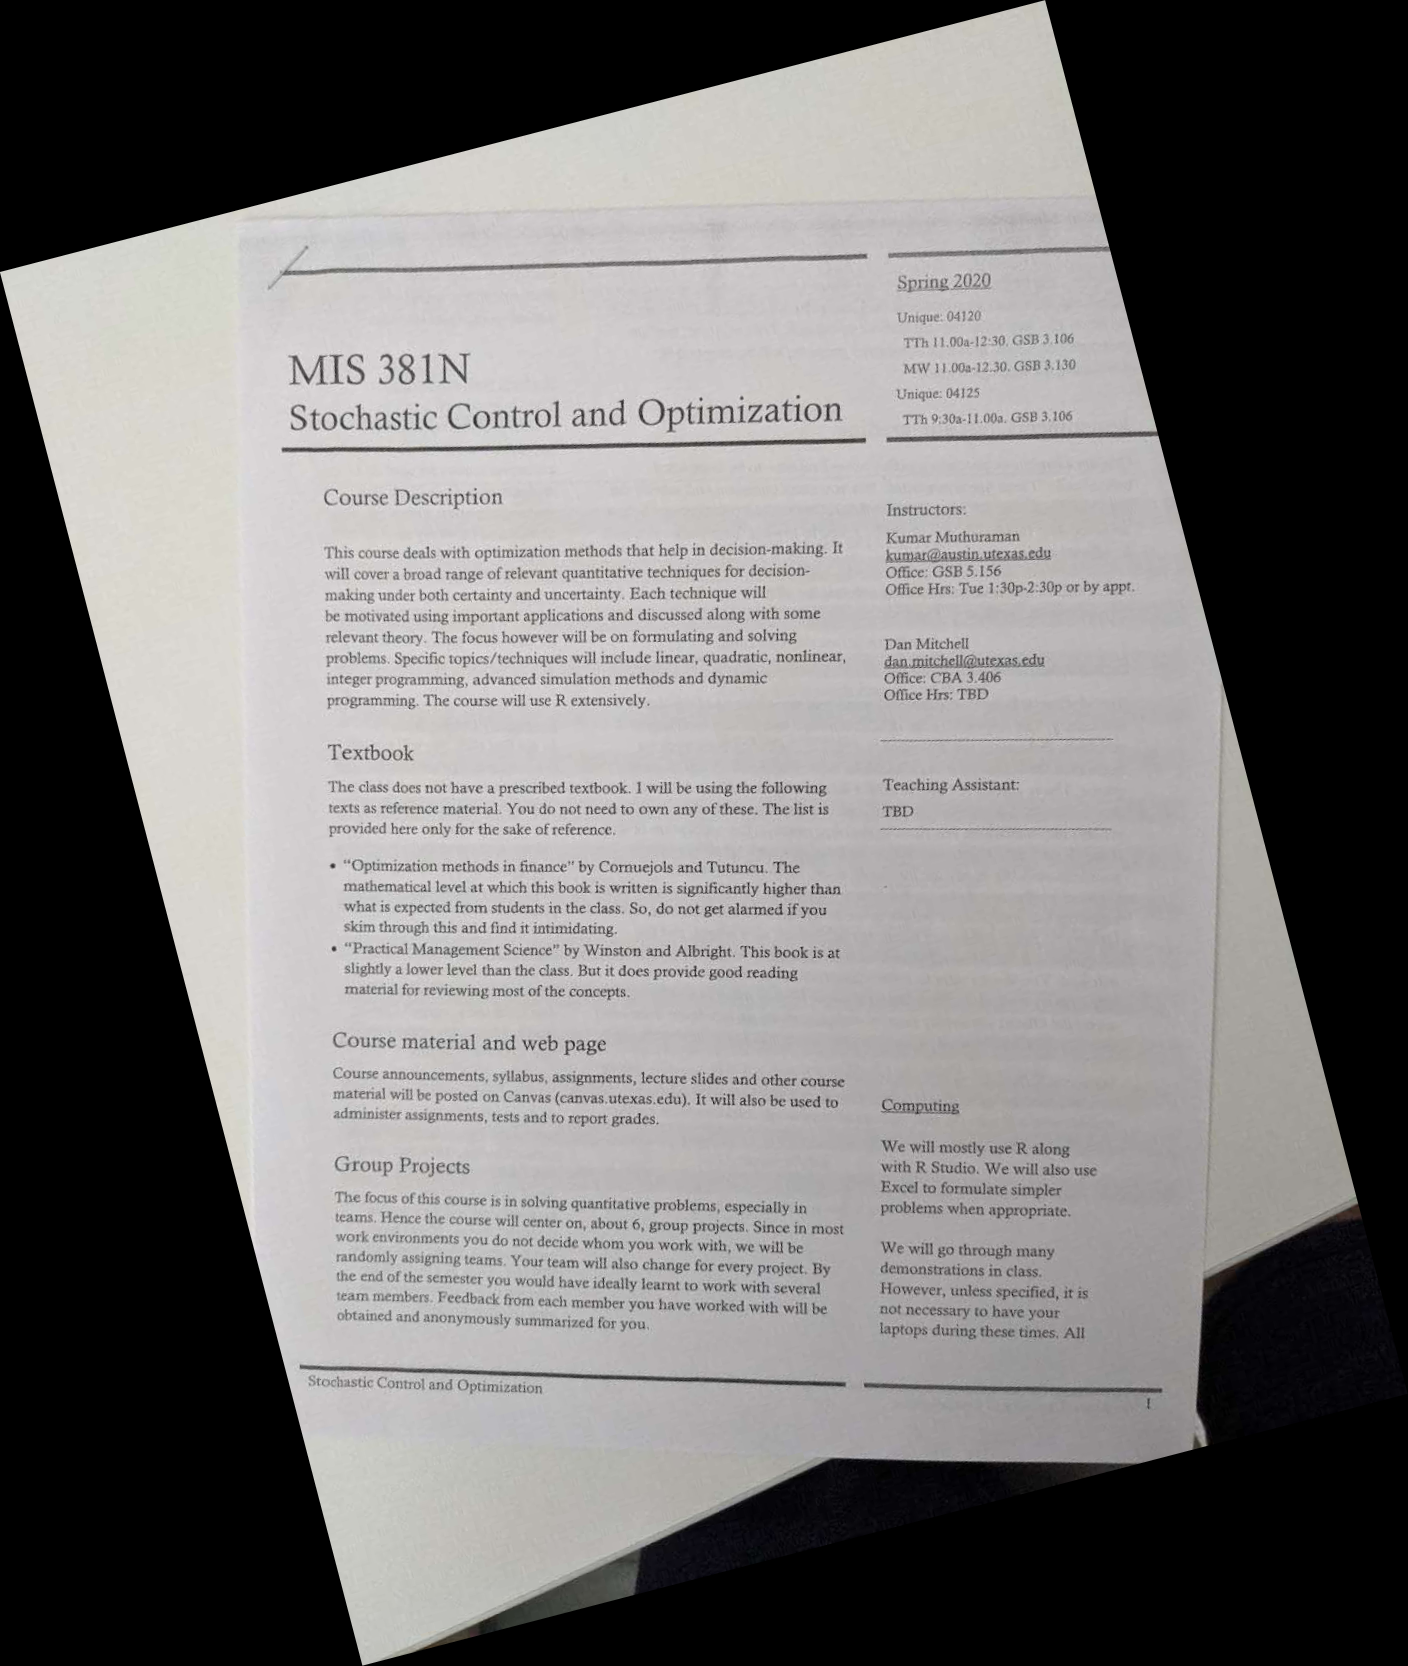

In [13]:
Image('output_2.png')